# Trabalho prático DAA

### The Data

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [154]:
data = pd.read_csv('sbstpdaa2223/training_data.csv')
test = pd.read_csv('sbstpdaa2223/test_data.csv')

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

<AxesSubplot:>

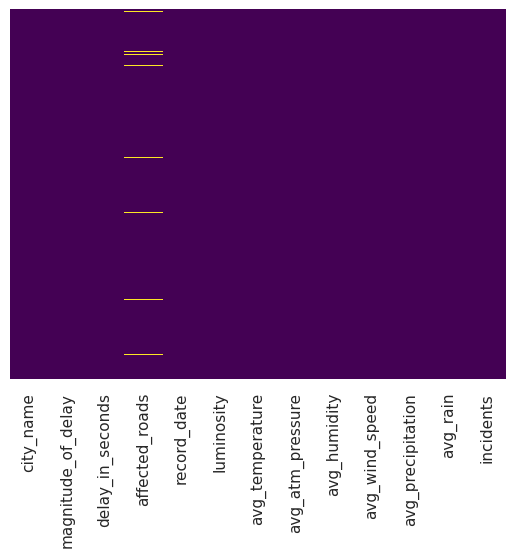

In [155]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [156]:
#count the null values in each column
data.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [157]:
data.head()

city_name magnitude_of_delay  delay_in_seconds  \
0  Guimaraes          UNDEFINED                 0   
1  Guimaraes          UNDEFINED               385   
2  Guimaraes          UNDEFINED                69   
3  Guimaraes              MAJOR              2297   
4  Guimaraes          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_precipitation   avg_rain  incidents  
0                0.0  Sem Chuva       None  
1                0.0  Sem Chuva       None  
2                0.0  Sem Chuva        Low  
3                0.0  Sem Chuva  Very_High  
4                0.0  Sem Chuva       High

In [158]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

### Remover avg_perciptation e city_name uma vez que são sempre iguais

In [159]:
data.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)
test.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)

In [160]:
data.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

In [161]:
#check if exists duplicated rows
data.duplicated().sum()
#remove duplicated rows
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

magnitude_of_delay  delay_in_seconds  \
0             UNDEFINED                 0   
1             UNDEFINED               385   
2             UNDEFINED                69   
3                 MAJOR              2297   
4             UNDEFINED                 0   
...                 ...               ...   
4910          UNDEFINED                 0   
4911          UNDEFINED                 0   
4912          UNDEFINED                 0   
4913          UNDEFINED                 0   
4914          UNDEFINED                 0   

                                         affected_roads       record_date  \
0                                                     ,  2021-03-15 23:00   
1                                                 N101,  2021-12-25 18:00   
2                                                     ,  2021-03-12 15:00   
3     N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                             N101,N101,N101,N101,N101,  2021-06-13 11:00   
...                                                 ...               ...   
4910                          N101,N101,N101,N101,N101,  2021-04-13 00:00   
4911                           N101,N101,N101,N101,N101  2021-07-06 14:00   
4912                                                  ,  2021-03-18 03:00   
4913                           N101,N101,N101,N101,N101  2021-11-02 06:00   
4914                           N101,N101,N101,N101,N101  2021-12-20 02:00   

     luminosity  avg_temperature  avg_atm_pressure  avg_humidity  \
0          DARK             12.0            1013.0          70.0   
1          DARK             12.0            1007.0          91.0   
2         LIGHT             14.0            1025.0          64.0   
3         LIGHT             15.0            1028.0          75.0   
4         LIGHT             27.0            1020.0          52.0   
...         ...              ...               ...           ...   
4910       DARK             13.0            1021.0          56.0   
4911      LIGHT             19.0            1017.0          68.0   
4912       DARK             13.0            1023.0          47.0   
4913       DARK             12.0            1014.0          93.0   
4914       DARK             12.0            1018.0          77.0   

      avg_wind_speed   avg_rain  incidents  
0                1.0  Sem Chuva       None  
1                1.0  Sem Chuva       None  
2                0.0  Sem Chuva        Low  
3                1.0  Sem Chuva  Very_High  
4                1.0  Sem Chuva       High  
...              ...        ...        ...  
4910             0.0  Sem Chuva       High  
4911             0.0  Sem Chuva       None  
4912             2.0  Sem Chuva       None  
4913             2.0  Sem Chuva       None  
4914             3.0  Sem Chuva       None  

[4915 rows x 11 columns]

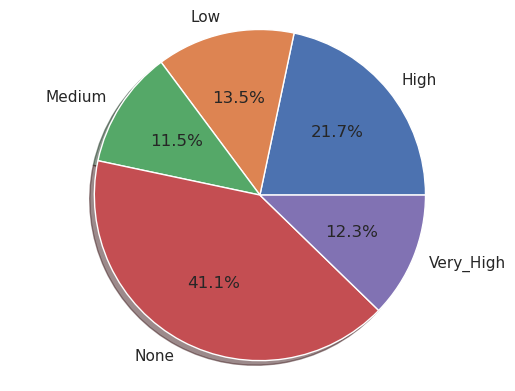

In [162]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


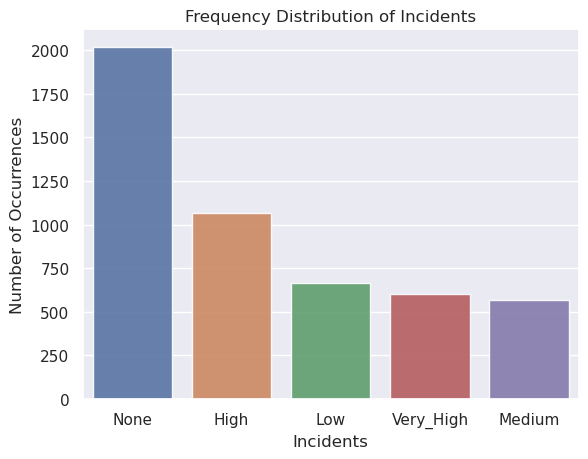

In [163]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")

sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)

plt.show()

In [164]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High' : 3, 'Very_High':4}}

In [165]:
data.replace(replace_map, inplace = True)
test.replace(replace_map, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

    avg_rain  incidents  
0  Sem Chuva          0  
1  Sem Chuva          0  
2  Sem Chuva          1  
3  Sem Chuva          4  
4  Sem Chuva          3

In [166]:
data['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [167]:
replace_map_rain = {'avg_rain': {'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}}

In [168]:
data.replace(replace_map_rain, inplace = True)
test.replace(replace_map_rain, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_rain  incidents  
0         0          0  
1         0          0  
2         0          1  
3         0          4  
4         0          3

In [169]:
data['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [170]:
replace_map_luminosity = {'luminosity': {'LOW_LIGHT' : 0, 'LIGHT' : 1, 'DARK' : 2}}

In [171]:
data.replace(replace_map_luminosity, inplace = True)
test.replace(replace_map_luminosity, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

   luminosity  avg_temperature  avg_atm_pressure  avg_humidity  \
0           2             12.0            1013.0          70.0   
1           2             12.0            1007.0          91.0   
2           1             14.0            1025.0          64.0   
3           1             15.0            1028.0          75.0   
4           1             27.0            1020.0          52.0   

   avg_wind_speed  avg_rain  incidents  
0             1.0         0          0  
1             1.0         0          0  
2             0.0         0          1  
3             1.0         0          4  
4             1.0         0          3

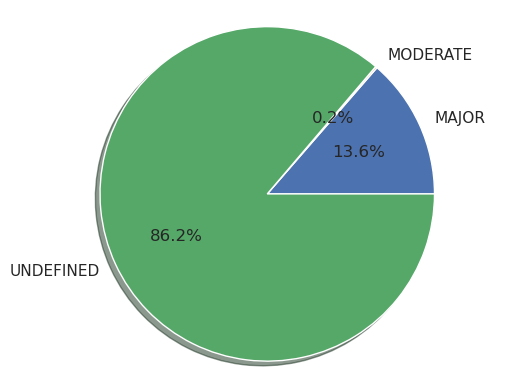

In [172]:
labels = data['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = data['magnitude_of_delay'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

<AxesSubplot:title={'center':'Magnitude e output target'}>

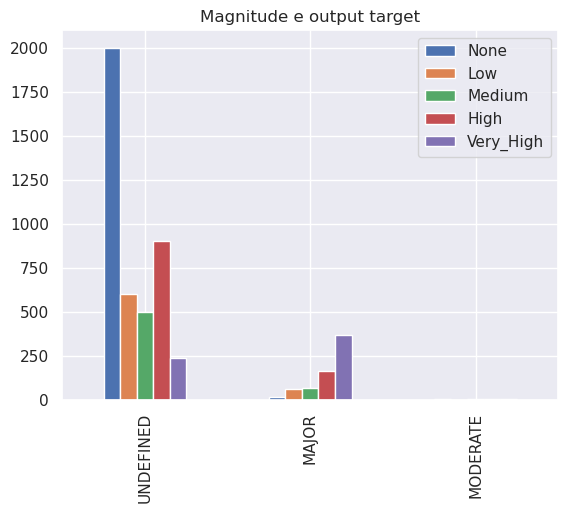

In [173]:
magnitude_target = pd.DataFrame()
magnitude_target['None'] = data[data['incidents'] == 0]['magnitude_of_delay'].value_counts()
magnitude_target['Low'] = data[data['incidents'] == 1]['magnitude_of_delay'].value_counts()
magnitude_target['Medium'] = data[data['incidents'] == 2]['magnitude_of_delay'].value_counts()
magnitude_target['High'] = data[data['incidents'] == 3]['magnitude_of_delay'].value_counts()
magnitude_target['Very_High'] = data[data['incidents'] == 4]['magnitude_of_delay'].value_counts()
magnitude_target.plot.bar(title="Magnitude e output target")

In [174]:
#one hot encoding
label = LabelBinarizer()
lb_results = label.fit_transform(data['magnitude_of_delay'])
lb_results_df = pd.DataFrame(lb_results, columns=label.classes_)
data = pd.concat([data, lb_results_df], axis=1)
data.drop(['magnitude_of_delay'], axis = 1, inplace = True)
data

lb_results = label.fit_transform(test['magnitude_of_delay'])
lb_results_df = pd.DataFrame(lb_results, columns=label.classes_)
test = pd.concat([test, lb_results_df], axis=1)
test.drop(['magnitude_of_delay'], axis = 1, inplace = True)


In [175]:
#remove affected rows
data.drop('affected_roads', axis = 1, inplace = True)
test.drop('affected_roads', axis = 1, inplace = True)
data

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                    0  2021-03-15 23:00           2             12.0   
1                  385  2021-12-25 18:00           2             12.0   
2                   69  2021-03-12 15:00           1             14.0   
3                 2297  2021-09-29 09:00           1             15.0   
4                    0  2021-06-13 11:00           1             27.0   
...                ...               ...         ...              ...   
4910                 0  2021-04-13 00:00           2             13.0   
4911                 0  2021-07-06 14:00           1             19.0   
4912                 0  2021-03-18 03:00           2             13.0   
4913                 0  2021-11-02 06:00           2             12.0   
4914                 0  2021-12-20 02:00           2             12.0   

      avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  incidents  \
0               1013.0          70.0             1.0         0          0   
1               1007.0          91.0             1.0         0          0   
2               1025.0          64.0             0.0         0          1   
3               1028.0          75.0             1.0         0          4   
4               1020.0          52.0             1.0         0          3   
...                ...           ...             ...       ...        ...   
4910            1021.0          56.0             0.0         0          3   
4911            1017.0          68.0             0.0         0          0   
4912            1023.0          47.0             2.0         0          0   
4913            1014.0          93.0             2.0         0          0   
4914            1018.0          77.0             3.0         0          0   

      MAJOR  MODERATE  UNDEFINED  
0         0         0          1  
1         0         0          1  
2         0         0          1  
3         1         0          0  
4         0         0          1  
...     ...       ...        ...  
4910      0         0          1  
4911      0         0          1  
4912      0         0          1  
4913      0         0          1  
4914      0         0          1  

[4915 rows x 12 columns]

In [177]:
data_dt = data.copy()

In [178]:
data_dt['record_date'] = pd.to_datetime(data_dt['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')

In [179]:
data_dt['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [180]:
data['date_year'] = data_dt['record_date'].dt.year
data['date_month'] = data_dt['record_date'].dt.month
data['date_day'] = data_dt['record_date'].dt.day
data['date_hour'] = data_dt['record_date'].dt.hour
data.drop(['record_date'], axis=1, inplace = True)
test['date_year'] = data_dt['record_date'].dt.year
test['date_month'] = data_dt['record_date'].dt.month
test['date_day'] = data_dt['record_date'].dt.day
test['date_hour'] = data_dt['record_date'].dt.hour
test.drop(['record_date'], axis=1, inplace = True)
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0          70.0             1.0         0          0      0         0   
1          91.0             1.0         0          0      0         0   
2          64.0             0.0         0          1      0         0   
3          75.0             1.0         0          4      1         0   
4          52.0             1.0         0          3      0         0   

   UNDEFINED  date_year  date_month  date_day  date_hour  
0          1       2021           3        15         23  
1          1       2021          12        25         18  
2          1       2021           3        12         15  
3          0       2021           9        29          9  
4          1       2021           6        13         11

In [181]:
data['date_year'].unique()

array([2021])

In [182]:
data.drop(['date_year'], axis=1, inplace = True)
test.drop(['date_year'], axis=1, inplace = True)

In [183]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0          70.0             1.0         0          0      0         0   
1          91.0             1.0         0          0      0         0   
2          64.0             0.0         0          1      0         0   
3          75.0             1.0         0          4      1         0   
4          52.0             1.0         0          3      0         0   

   UNDEFINED  date_month  date_day  date_hour  
0          1           3        15         23  
1          1          12        25         18  
2          1           3        12         15  
3          0           9        29          9  
4          1           6        13         11

In [184]:
test.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0              1211           1             15.0            1018.0   
1                 0           2             16.0            1018.0   
2                 0           1             22.0            1017.0   
3               140           1             18.0            1008.0   
4                 0           1             20.0            1022.0   

   avg_humidity  avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED  \
0          80.0             0.0         0      0         0          1   
1          41.0             2.0         0      0         0          1   
2          71.0             0.0         0      0         0          1   
3          81.0             3.0         0      0         0          1   
4          86.0             0.0         0      0         0          1   

   date_month  date_day  date_hour  
0           3        15         23  
1          12        25         18  
2           3        12         15  
3           9        29          9  
4           6        13         11

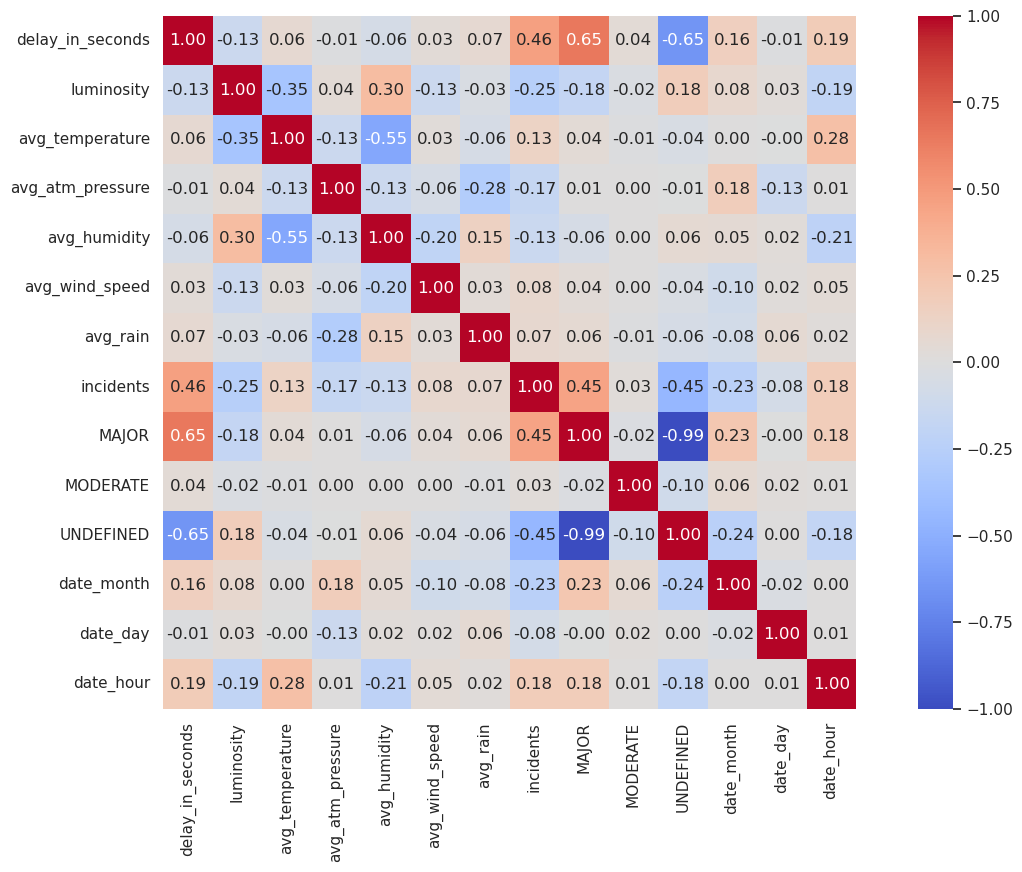

In [91]:
#Correlation
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm');

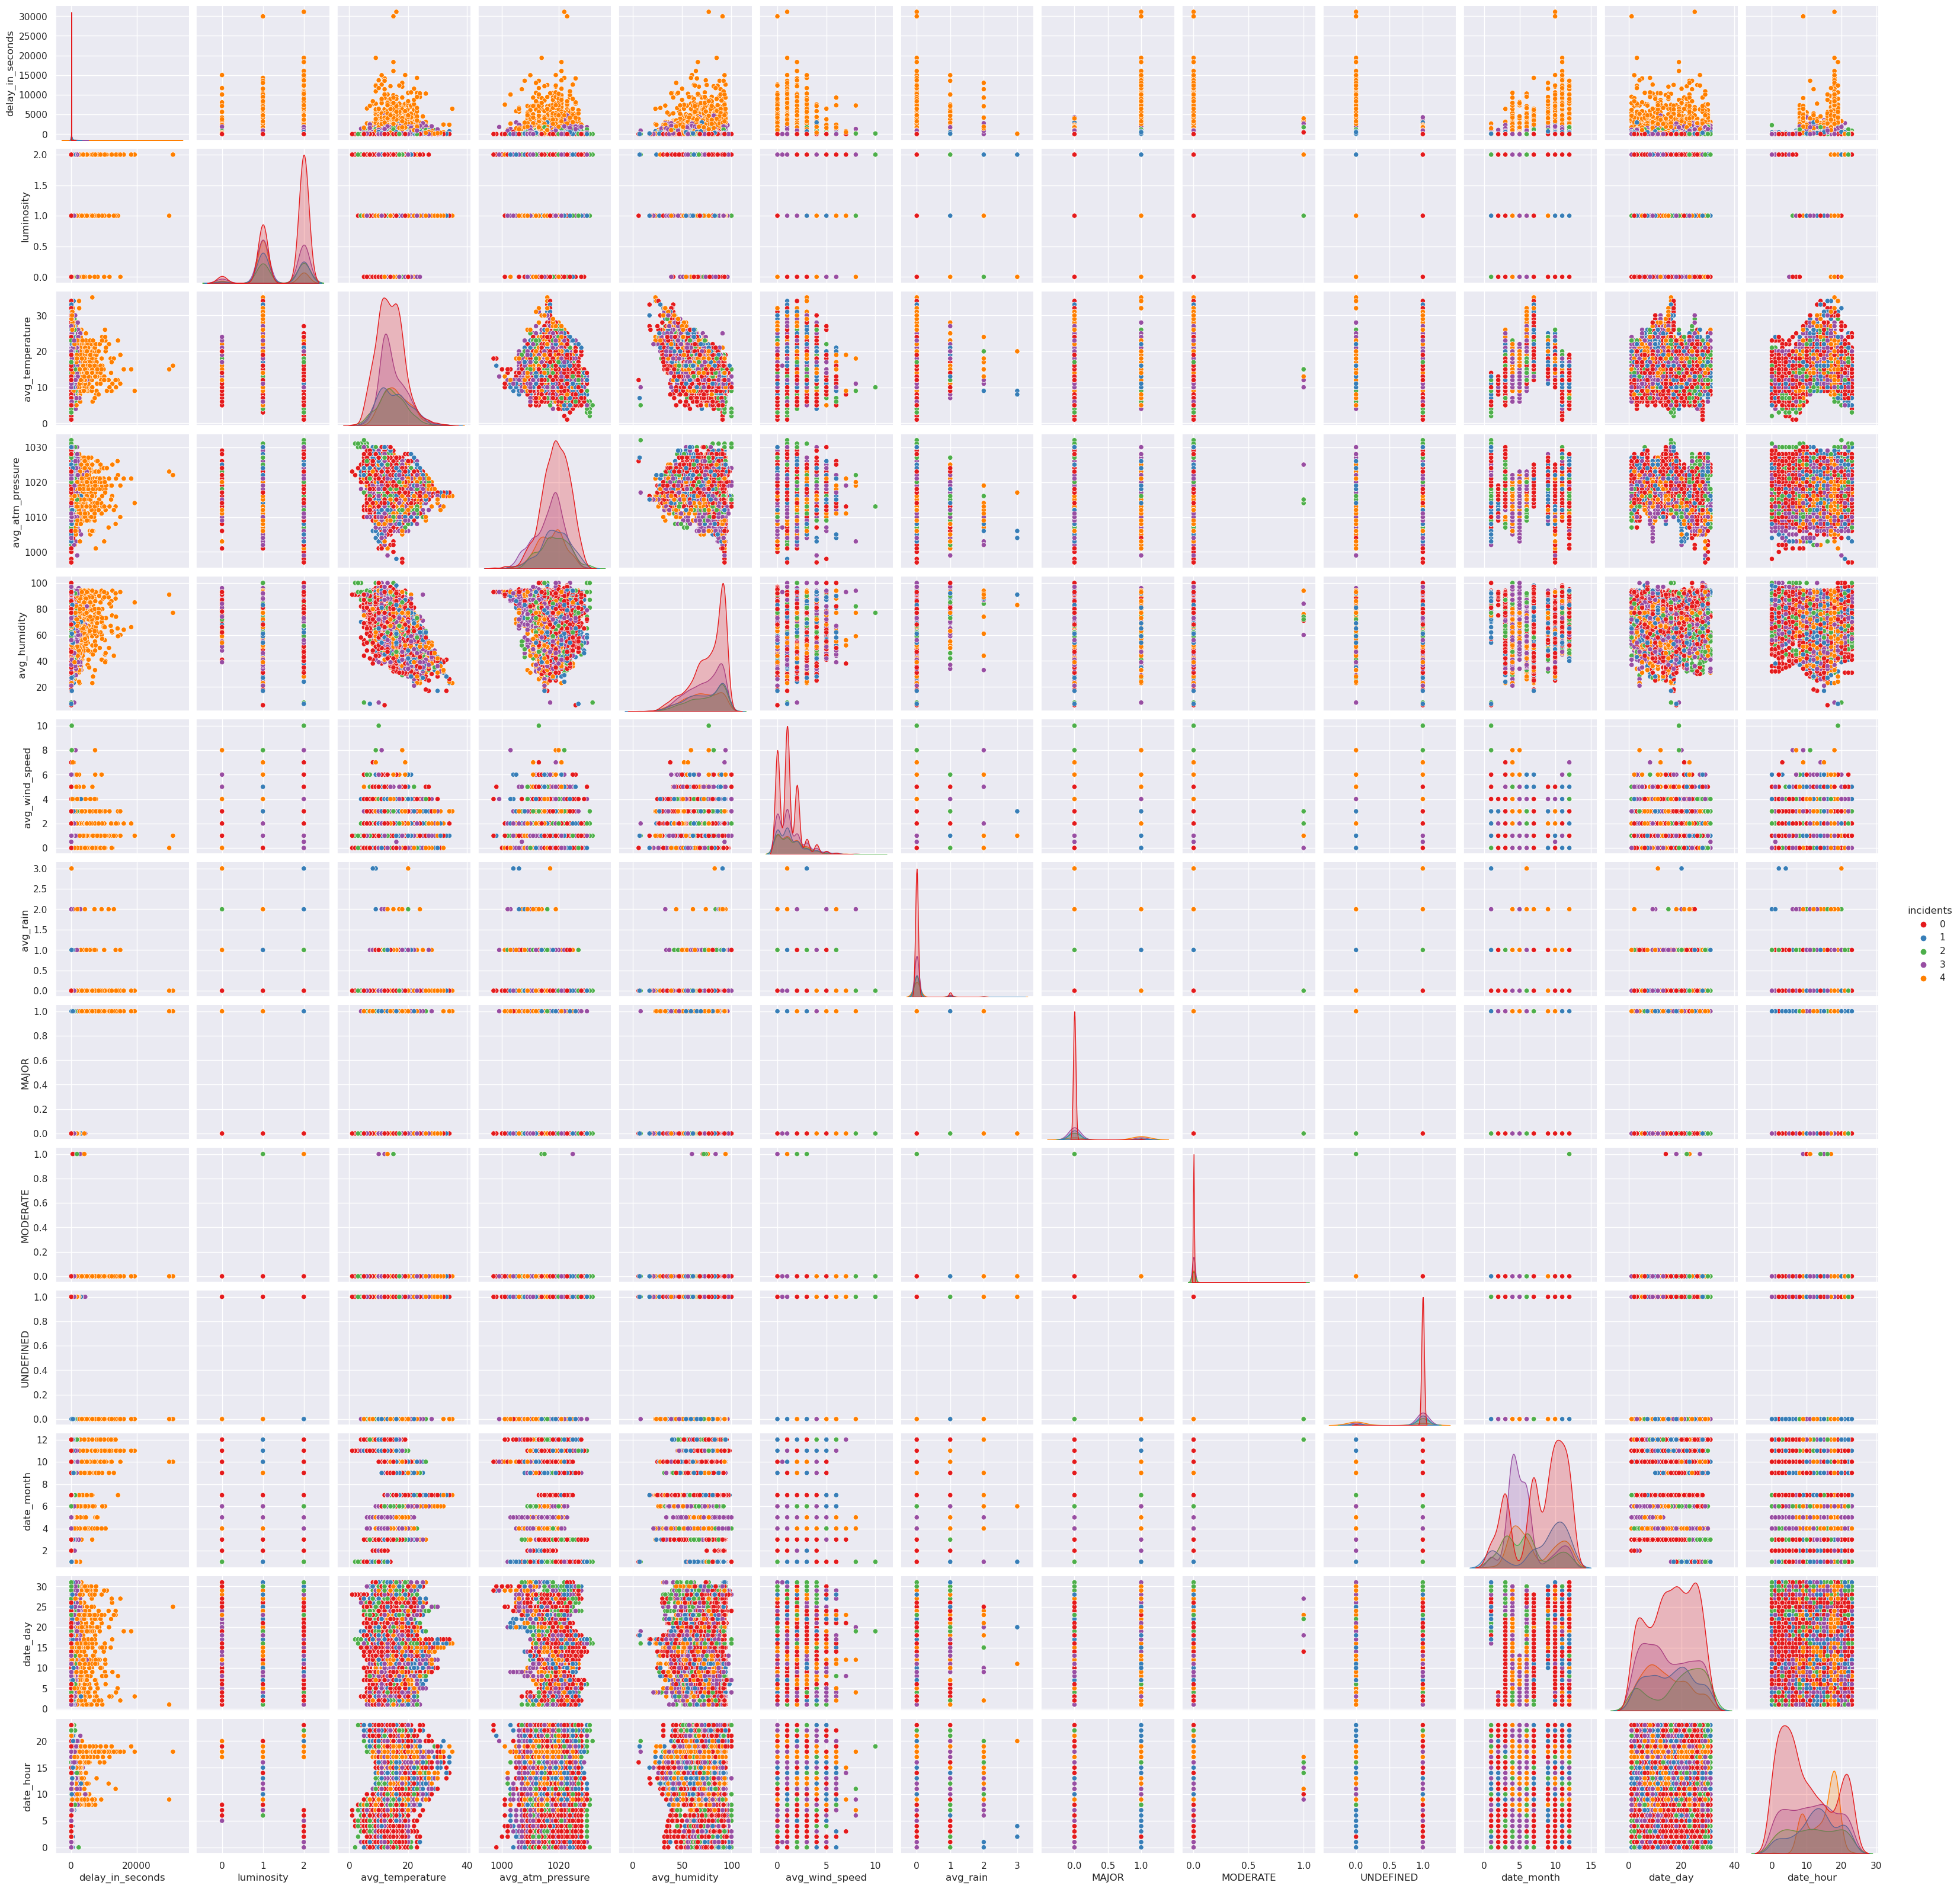

In [92]:
sns.pairplot(data, hue='incidents', palette='Set1')

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

In [317]:
...

Ellipsis

# Train Test Split

** Split your data into a training set and a testing set.**

In [318]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  date_month  date_day  \
0          70.0             1.0         0          0           3        15   
1          91.0             1.0         0          0          12        25   
2          64.0             0.0         0          1           3        12   
3          75.0             1.0         0          4           9        29   
4          52.0             1.0         0          3           6        13   

   date_hour  
0         23  
1         18  
2         15  
3          9  
4         11

In [319]:
test.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0              1211           1             15.0            1018.0   
1                 0           2             16.0            1018.0   
2                 0           1             22.0            1017.0   
3               140           1             18.0            1008.0   
4                 0           1             20.0            1022.0   

   avg_humidity  avg_wind_speed  avg_rain  date_month  date_day  date_hour  
0          80.0             0.0         0           3        15         23  
1          41.0             2.0         0          12        25         18  
2          71.0             0.0         0           3        12         15  
3          81.0             3.0         0           9        29          9  
4          86.0             0.0         0           6        13         11

In [93]:
X = data.drop('incidents', axis=1)
Y = data[['incidents']]
#X_train = data.drop(['incidents'], axis=1)
#y_train = data['incidents']
#X_test = test

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2022, stratify=Y)

## Decison Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [221]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
clf = DecisionTreeClassifier(random_state=2022)

In [222]:
#to csv
X_train = data.drop(['incidents'], axis=1)
y_train = data['incidents']
X_test = test

In [223]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [224]:
predictions = clf.predict(X_test)
predictions

array([3, 1, 0, ..., 3, 1, 3])

In [225]:
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [100]:
confusion_matrix(y_test, predictions)

array([[384,  15,   4,   0,   0],
       [ 15, 107,   7,   3,   1],
       [  1,   4,  98,   8,   2],
       [  1,   4,  11, 181,  16],
       [  0,   0,   1,  15, 105]])

In [101]:
accuracy_score(y_test, predictions)

0.8901322482197355

In [102]:
precision_score(y_test, predictions, average='macro')

0.8623541184600636

In [103]:
recall_score(y_test, predictions, average='macro')

0.8684310733271607

In [104]:
f1_score(y_test, predictions, average='macro')

0.8651133100358456

In [105]:
fbeta_score(y_test, predictions, beta=0.5, average='macro')

0.8633931190684379

## SVM

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 3472 to 4186
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  3932 non-null   int64  
 1   luminosity        3932 non-null   int64  
 2   avg_temperature   3932 non-null   float64
 3   avg_atm_pressure  3932 non-null   float64
 4   avg_humidity      3932 non-null   float64
 5   avg_wind_speed    3932 non-null   float64
 6   avg_rain          3932 non-null   int64  
 7   MAJOR             3932 non-null   int64  
 8   MODERATE          3932 non-null   int64  
 9   UNDEFINED         3932 non-null   int64  
 10  date_month        3932 non-null   int64  
 11  date_day          3932 non-null   int64  
 12  date_hour         3932 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 430.1 KB


In [204]:
#to csv
#X_train = data.drop(['incidents'], axis=1)
#y_train = data['incidents']
#X_test = test

In [208]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, np.ravel(y_train), cv=10)
scores

array([0.54674797, 0.53252033, 0.56707317, 0.56504065, 0.56707317,
       0.55193483, 0.55804481, 0.53564155, 0.55600815, 0.54989817])

In [209]:
print("%0.2f accuracy" % (scores.mean()))

0.55 accuracy


In [210]:
model = SVC(random_state=2021)
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [211]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [212]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [983, 1206]

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


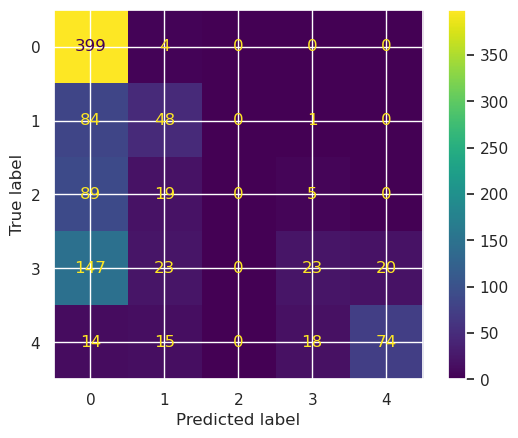

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70       403
           1       0.44      0.36      0.40       133
           2       0.00      0.00      0.00       113
           3       0.49      0.11      0.18       213
           4       0.79      0.61      0.69       121

    accuracy                           0.55       983
   macro avg       0.45      0.41      0.39       983
weighted avg       0.49      0.55      0.46       983



/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3, n_jobs=-1)

In [217]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.451 total time=   6.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.449 total time=   6.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.410 total time=   8.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.411 total time=   8.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.411 total time=   9.5s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.411 total time=   9.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.410 total time=  10.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.411 total time=  10.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.411 total time=  10.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.410 total time=  11.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.411 total time=  12.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [218]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [219]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2021)

In [220]:
#to csv
predictions = grid.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


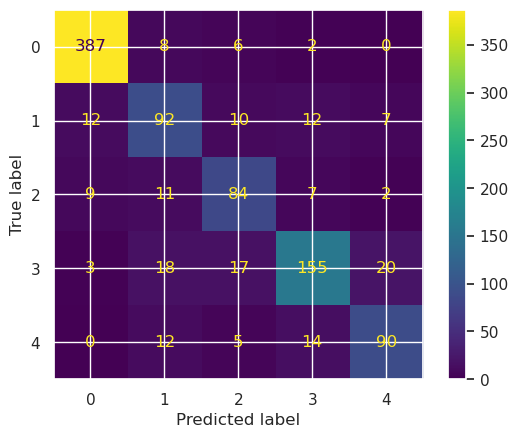

In [133]:
plot_confusion_matrix(grid, X_test, y_test)

In [134]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       403
           1       0.65      0.69      0.67       133
           2       0.69      0.74      0.71       113
           3       0.82      0.73      0.77       213
           4       0.76      0.74      0.75       121

    accuracy                           0.82       983
   macro avg       0.77      0.77      0.77       983
weighted avg       0.82      0.82      0.82       983



## Neural

Build our neural network 

In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler


2022-11-24 00:18:05.109108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [136]:
#one-hot encoding
#from sklearn.preprocessing import LabelBinarizer
#
#lb = LabelBinarizer()
#lb_results = lb.fit_transform(Y)
#Y_one_hot = pd.DataFrame(lb_results, columns=lb.classes_)

In [137]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#Y_scaled = pd.DataFrame(scaler_y.transform(Y[Y.columns]), columns=Y.columns)

In [185]:
# to generate the csv
X = data.drop('incidents', axis=1)
Y = test

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)

scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
Y_scaled = pd.DataFrame(scaler_Y.transform(Y[Y.columns]), columns=Y.columns)

X_train = X_scaled
y_train = data[['incidents']]

X_test = Y_scaled


In [139]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=2022, stratify=Y)

In [186]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4915, 13) (4915, 1) (1206, 13) (983, 1)


In [194]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    #model.add(Dense(20, input_dim=10, activation=activation))
    model.add(Dense(26, input_dim=13, activation='relu'))
    #model.add(Dense(13, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

In [195]:
model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 26)                364       
                                                                 
 dense_16 (Dense)            (None, 5)                 135       
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [196]:
TUNING_DICT = {
    #'activation': ['relu', 'tanh'],
    'learning_rate' : [0.01,0.001],
    'batch_size' : [32],
    'epochs' : [40]
}

In [197]:
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           verbose = 3,
                           n_jobs = -1)

grid_search.fit(X_train, y_train, validation_split=0.3)

/tmp/ipykernel_16353/1374826196.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
97/97 [==============================] - 4s 21ms/step - loss: 1.2750 - accuracy: 0.4851 - val_loss: 1.2272 - val_accuracy: 0.4864
Epoch 2/40
97/97 [==============================] - 3s 20ms/step - loss: 1.2944 - accuracy: 0.4742 - val_loss: 1.2902 - val_accuracy: 0.4744
Epoch 2/40
97/97 [==============================] - 4s 25ms/step - loss: 1.3465 - accuracy: 0.4616 - val_loss: 1.2663 - val_accuracy: 0.4838
Epoch 2/40
97/97 [==============================] - 4s 25ms/step - loss: 1.2950 - accuracy: 0.4829 - val_loss: 1.2650 - val_accuracy: 0.4582
Epoch 2/40
97/97 [==============================] - 4s 19ms/step - loss: 1.4602 - accuracy: 0.4118 - val_loss: 1.4164 - val_accuracy: 0.4476
Epoch 2/40
97/97 [==============================] - 4s 28ms/step - loss: 1.3204 - accuracy: 0.4661 - val_loss: 1.

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8f580aac10>,
             n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [40],
                         'learning_rate': [0.01, 0.001]},
             scoring='accuracy', verbose=3)

In [198]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))


Best: 0.746281 using {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.746281 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.604281 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.001}


In [199]:
best_mlp_model = grid_search.best_estimator_

In [200]:
predictions = best_mlp_model.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

38/38 [==============================] - 0s 6ms/step


In [149]:
from livelossplot import PlotLossesKerasTF

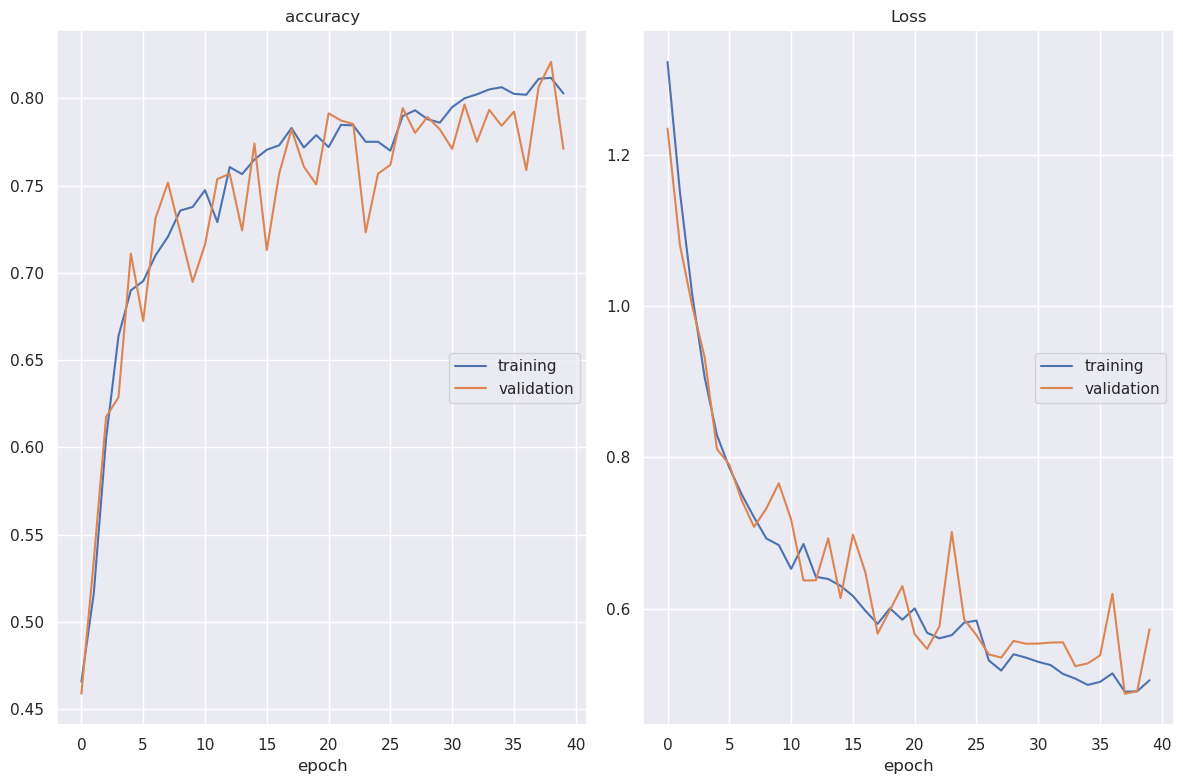

accuracy
	training         	 (min:    0.466, max:    0.812, cur:    0.803)
	validation       	 (min:    0.459, max:    0.821, cur:    0.771)
Loss
	training         	 (min:    0.490, max:    1.323, cur:    0.505)
	validation       	 (min:    0.488, max:    1.234, cur:    0.573)
123/123 [==============================] - 2s 19ms/step - loss: 0.5054 - accuracy: 0.8029 - val_loss: 0.5728 - val_accuracy: 0.7711


In [150]:
#print the validation accuracy and loss after each epoch
plot_losses = PlotLossesKerasTF()

best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)

In [405]:
predictions = best_mlp_model.predict(X_test)

47/47 [==============================] - 1s 11ms/step
